## **Clustering with Images**

If you are given an image, can you use clustering to build any cool image applications?

**Image Compression**

An image is made of pixels and each pixel has a colour associated with it. Every colour can be represented in a numeric scale. High resolution images are rich in numerical pixel data and are thus heavy. If you were to "compress" the image, the easiest thing to do would be to reduce the number of colours being represented by the image.

Say you are given an image, and it visually has 5 main sections/colors. Can you cluster each pixel into one of these 5 sections/colors and recolour

In [1]:
#Provide the URL to the raw image you would like to compress here. Few examples have been provided below, uncommment as needed.

#Island
image_location = 'https://user-images.githubusercontent.com/42711978/87903363-71f5a900-ca79-11ea-9317-3c7dc7eccc27.jpg'

#Mountain Sunset
# image_location = "https://user-images.githubusercontent.com/42711978/89704910-35311980-d976-11ea-82a0-bfb4b3c68450.jpg"

#Beach
# image_location = "https://user-images.githubusercontent.com/42711978/89704910-35311980-d976-11ea-82a0-bfb4b3c68450.jpg"

#Peacock
# image_location = "https://user-images.githubusercontent.com/42711978/89704912-39f5cd80-d976-11ea-92fe-7bca75f68722.jpg"

#Cathedral
# image_location = "https://user-images.githubusercontent.com/42711978/89704914-3d895480-d976-11ea-83e1-56d0393dd8e5.jpg"

In [2]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Image shape = (1200, 1600, 3)


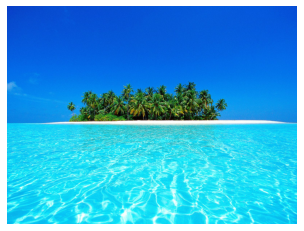

Total Pixels = 1920000
Data Sample: 


array([[  3,  57, 192],
       [  9,  63, 198],
       [ 12,  66, 201]], dtype=uint8)

In [3]:
image = io.imread(image_location)

#Lets check out the dimensions of the numerical representation of the image
print("Image shape = " + str(image.shape))

#View the image using matplotlib
plt.imshow(image)
plt.axis(False)
plt.show()

#Extract the numerical representations of pixels with (R,G,B) values
#it converts the MxNx3 image into a Kx3 matrix where K=MxN 
# Each row is now a vector in the 3-D space of RGB
all_pixels = image.reshape((-1,3))
print("Total Pixels = " + str(len(all_pixels)))

#Peek into the data to understand coordinates
print("Data Sample: ")
all_pixels[:3]

> **Optimal value for k:** Since this image has 3 main sections (sky, forest and sea) we can set k = 3 so the points are clustered to be one of these sections. Try out different values to see how the image representation changes!



CLUSTER-LEVEL DOMINANT COLOURS (K = 3)


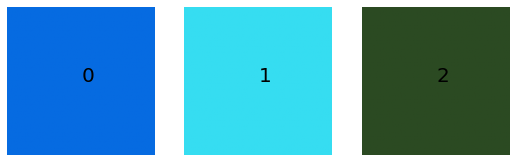

In [4]:
#Update the optimal value of k below
k=3

#Build a clustering model on the pixels
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)
kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint") 

fig, axs = plt.subplots(1, k)
fig.set_size_inches(3 * k, 3, forward=True)
for clusternumber in range(0,len(kmeans_centroids)):
  centroid = np.zeros((100,100,3))
  centroid[:,:,:] = kmeans_centroids[clusternumber]
  axs[clusternumber].imshow(centroid/255)
  axs[clusternumber].text(50,50,str(clusternumber),fontsize=20)
  axs[clusternumber].axis("off")

print("CLUSTER-LEVEL DOMINANT COLOURS (K = " + str(k) + ")")
plt.show()

In [5]:
#The predictions of the cluster number for each pixels
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [6]:
#Let us "compress" the image
#This is done by assigning each pixel to be the dominant colour of the cluster it belongs to.
image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
for ix in range(all_pixels.shape[0]):
    image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
image_compressed = image_compressed.reshape(image.shape)

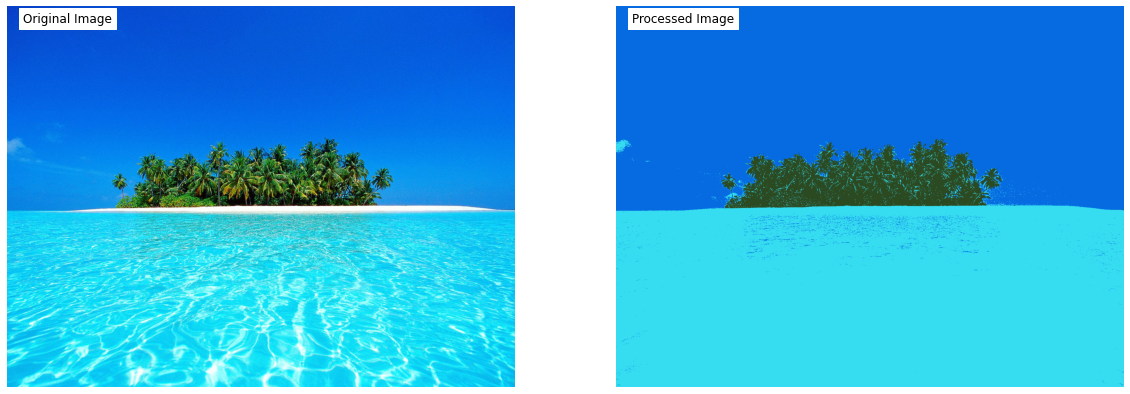

In [7]:
#Let us compare our image and compressed image
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

axs[0].imshow(image)
axs[0].text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[0].axis(False)

axs[1].imshow(image_compressed)
axs[1].text(50,50,"Processed Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[1].axis(False)

plt.show()



> **TRY THIS OUT!**
1. Increase the **value of k** to see how you can represent the least resolution and best quality version of your image.
2. Try out **different images** to explore this cool feature.
3. Think of ways to **optimally decide k** without manual intervention
4. Are there **other applications** other than compression? (hint: filters)

